# Result of CAE + CNN

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorboard as tb
import numpy as np

In [2]:
def calc_mean_f1_score(df):
    """ f1 score calculator """
    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    f1_mean_map = {}
    for cls_nm in class_names:
        f1_scores = []
        for fold_idx in range(5):
            f1 = df.loc[df["run"]==f"valid_fold{fold_idx+1}_f1-score_{cls_nm}"].sort_values(by=["step"], ascending=False)["value"].iloc[0]
            f1_scores.append(np.round(f1, 2))
        f1_mean_map[cls_nm] = np.mean(f1_scores)
    return f1_mean_map

In [3]:
def calc_mean_acc_score(df):
    acc_scores = []
    for fold_idx in range(5):
        acc = df.loc[df["run"]==f"valid_acc_fold{fold_idx+1}"].sort_values(by=["step"], ascending=False)["value"].iloc[0]
        acc_scores.append(acc)
    return np.mean(acc_scores)

# Baseline vs CAE + CNN (code is fed as input)

In [6]:
# read results from tensorboard
experiment_id = "clKHr7h1Q8WArvq8VTNNqg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_baseline = experiment.get_scalars()

In [5]:
# read results from tensorboard
experiment_id = "5L7OxgMXTDKAZ6Ocpd5ypw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_cae_cnn_input = experiment.get_scalars()

F1 score 比較

In [7]:
f1_mean_map_baseline = calc_mean_f1_score(df_baseline)
f1_mean_map_cae_cnn_input = calc_mean_f1_score(df_cae_cnn_input)
df_f1_comp1 = pd.DataFrame([f1_mean_map_baseline, f1_mean_map_cae_cnn_input], index=["Baseline", "Code is input"])
summary_f1_comp1 = pd.concat([df_f1_comp1, pd.DataFrame(df_f1_comp1.loc["Code is input", :] - df_f1_comp1.loc["Baseline", :]).transpose()], axis=0)
summary_f1_comp1.index = ["Baseline", "Code is input", "Improvement"]
summary_f1_comp1

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Baseline,0.786,0.862,0.586,0.564,0.648,0.664,0.784,0.808,0.846,0.698
Code is input,0.772,0.830,0.542,0.540,0.604,0.644,0.774,0.780,0.828,0.660
Improvement,-0.014,-0.032,-0.044,-0.024,-0.044,-0.020,-0.010,-0.028,-0.018,-0.038


Mean validation acc

In [8]:
# valid acc
calc_mean_acc_score(df_cae_cnn_input)

0.7187294006347656

# Baseline vs CAE + CNN (Code is feature map)

In [9]:
# read results from tensorboard
experiment_id = "clKHr7h1Q8WArvq8VTNNqg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_baseline = experiment.get_scalars()

In [10]:
# read results from tensorboard
experiment_id = "M33H7SyVS4yBmCVpwVGQRw"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_cae_cnn_fmap = experiment.get_scalars()

F1 score 比較

In [13]:
f1_mean_map_baseline = calc_mean_f1_score(df_baseline)
f1_mean_map_cae_cnn_fmap = calc_mean_f1_score(df_cae_cnn_fmap)
df_f1_comp2 = pd.DataFrame([f1_mean_map_baseline, f1_mean_map_cae_cnn_fmap], index=["Baseline", "Code is feat map"])
summary_f1_comp2 = pd.concat([df_f1_comp2, pd.DataFrame(df_f1_comp2.loc["Code is feat map", :] - df_f1_comp2.loc["Baseline", :]).transpose()], axis=0)
summary_f1_comp2.index = ["Baseline", "Code is feat map", "Improvement"]
summary_f1_comp2

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Baseline,0.786,0.862,0.586,0.564,0.648,0.664,0.784,0.808,0.846,0.698
Code is feat map,0.790,0.858,0.598,0.554,0.622,0.668,0.784,0.804,0.848,0.694
Improvement,0.004,-0.004,0.012,-0.010,-0.026,0.004,0.000,-0.004,0.002,-0.004


Mean validation acc

In [12]:
# valid acc
calc_mean_acc_score(df_cae_cnn_fmap)

0.7404000043869019

Visualization

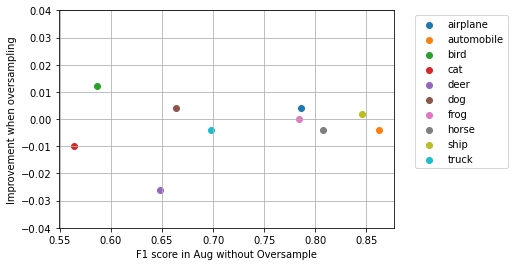

In [15]:
from matplotlib import pyplot as plt
for label in f1_mean_map_baseline.keys():
    plt.scatter(x=summary_f1_comp2.loc["Baseline", label], y=summary_f1_comp2.loc["Improvement", label], label=label)
plt.xlabel("F1 score in Aug without Oversample")
plt.ylabel("Improvement when oversampling")
plt.grid()
plt.ylim([-0.04, 0.04])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.savefig("./scatter_improve_cae_cnn_featmap.png", bbox_inches="tight")

Test acc

In [16]:
# read results from tensorboard
experiment_id = "kY1mdQTBTkahyTKPSE6Vyg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_cae_cnn_fmap_test = experiment.get_scalars()

In [18]:
# valid acc aug with oversampling
df_cae_cnn_fmap_test.loc[df_cae_cnn_fmap_test["run"]==f"valid_acc_fold1"].sort_values(by=["step"], ascending=False)["value"].iloc[0]

0.7103999853134155

Test acc遷移比較

In [20]:
# read results from tensorboard
experiment_id = "qxAAgHKrQqOGTzEEJQlGBg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df_baseline_test = experiment.get_scalars()

In [21]:
y_baseline = df_baseline_test.loc[df_baseline_test["run"]==f"valid_acc_fold1"].sort_values(by=["step"], ascending=True)["value"]
y_cae_cnn_fmap_test = df_cae_cnn_fmap_test.loc[df_cae_cnn_fmap_test["run"]==f"valid_acc_fold1"].sort_values(by=["step"], ascending=True)["value"]

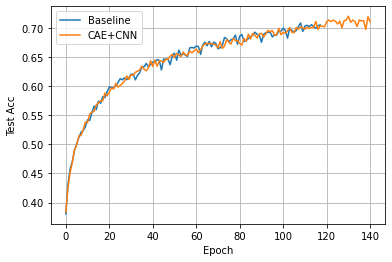

In [25]:
plt.plot(y_baseline, label="Baseline")
plt.plot(y_cae_cnn_fmap_test, label="CAE+CNN")
plt.xlabel("Epoch")
plt.ylabel("Test Acc")
plt.grid()
plt.legend()
plt.savefig("./test_acc_cae_cnn.png", bbox_inches="tight")